In [321]:
#import libraries
import pandas as pd
import glob
import os
from dotenv import dotenv_values
import pyodbc
import warnings
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import re


warnings.filterwarnings("ignore")

In [322]:
#loading environmental variables from .env
environmental_variables = dotenv_values(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\.env")

server = environmental_variables.get("SERVER")
username = environmental_variables.get("USERNAME")
password = environmental_variables.get("PASSWORD")
database = environmental_variables.get("DATABASE")

#create connection string
connection_string = f"DRIVER={{SQL Server}}; DATABASE={database}; SERVER={server}; UID={username}; PWD={password}"

In [323]:
connection = pyodbc.connect(connection_string)

In [324]:
db_query = ''' SELECT * 
               FROM INFORMATION_SCHEMA.TABLES
               WHERE TABLE_TYPE = 'BASE TABLE' '''

In [325]:
#calling selected table from database
ata = pd.read_sql(db_query, connection)
ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [326]:
query_01 = "SELECT * FROM dbo.Sales_July_2019"
july_data = pd.read_sql(query_01,connection)
july_data.to_csv('Sales_July_2019.csv', index = False)

In [327]:
query_02 = "SELECT * FROM dbo.Sales_August_2019"
august_data = pd.read_sql(query_02,connection)
august_data.to_csv('Sales_August_2019.csv', index = False)

In [328]:
query_03 = "SELECT * FROM dbo.Sales_September_2019"
september_data = pd.read_sql(query_03,connection)
september_data.to_csv('Sales_September_2019.csv', index = False)

In [329]:
query_04 = "SELECT * FROM dbo.Sales_October_2019"
october_data = pd.read_sql(query_04,connection)
october_data.to_csv('Sales_October_2019.csv', index = False)

In [330]:
query_05 = "SELECT * FROM dbo.Sales_November_2019"
november_data = pd.read_sql(query_05,connection)
november_data.to_csv('Sales_November_2019.csv', index = False)

In [331]:
query_06 = "SELECT * FROM dbo.Sales_December_2019"
december_data = pd.read_sql(query_06,connection)
december_data.to_csv('Sales_December_2019.csv', index = False)

In [332]:
# Define the folder where the CSV files are located
data_folder_path = r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data"

# List all CSV files for each month (assuming file names follow the pattern 'Sales_January_2019.csv', 'Sales_February_2019.csv', etc.)
csv_files = [
    "Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv",
    "Sales_April_2019.csv", "Sales_May_2019.csv", "Sales_June_2019.csv",
    "Sales_July_2019.csv", "Sales_August_2019.csv", "Sales_September_2019.csv",
    "Sales_October_2019.csv", "Sales_November_2019.csv", "Sales_December_2019.csv"
]

# List to store individual DataFrames
dataframes = []

# Load each CSV and append to the dataframes list
for file_name in csv_files:
    file_path = os.path.join(data_folder_path, file_name)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all the individual DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Now combined_df contains the data from all months
print(combined_df)


       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845      NaN    Lightning Charging Cable              NaN        NaN   
186846      NaN       AA Batteries (4-pack)              NaN        NaN   
186847      NaN             Vareebadd Phone              NaN        NaN   
186848      NaN            Wired Headphones              NaN        NaN   
186849      NaN  Bose SoundSport Headphones              NaN        NaN   

            Order Date                       Purchase Address  Order_ID  \
0       01/22/19 21:25  

In [333]:
july_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [334]:
#manually reading the data from january to june
january_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_January_2019.csv")
february_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_February_2019.csv")
march_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_March_2019.csv")
april_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_April_2019.csv")
may_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_May_2019.csv")
june_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_June_2019.csv")

In [335]:
january_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [336]:
first_half_sales_data = pd.concat([january_data, february_data, march_data, april_data, may_data, june_data])
first_half_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [337]:
second_half_sales_data = pd.concat([july_data, august_data, september_data, october_data, november_data, december_data])
second_half_sales_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [338]:
first_half_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [339]:
second_half_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [340]:
first_half_sales_data = first_half_sales_data.rename(columns={'Order ID' : 'Order_ID', 'Quantity Ordered' : 'Quantity_Ordered',
                                                              'Price Each':'Price_Each','Order Date': 'Order_Date', 'Purchase Address':'Purchase_Address'})

In [341]:
combined_df = pd.concat([first_half_sales_data, second_half_sales_data])
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [342]:
combined_df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [343]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [344]:
#taking care of null values
combined_df.dropna(thresh=int(0.8*len(df.columns)), inplace=True)  # Keep rows with at least 80% non-null values


In [345]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186110 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186110 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186110 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [346]:
combined_df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [347]:
# combined_df['Quantity_Ordered'] = combined_df['Quantity_Ordered'].astype('int64')
# combined_df['Price_Each'] = combined_df['Price_Each'].astype('float64')
# # Convert the 'Order Date' column to datetime
# combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'])
# # Format the datetime column to a more readable format, e.g., 'YYYY-MM-DD HH:MM:SS'
# combined_df['Order_Date'] = df['Order_Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [348]:
combined_df['Quantity_Ordered'] = pd.to_numeric(combined_df['Quantity_Ordered'], errors='coerce')
combined_df['Price_Each'] = pd.to_numeric(combined_df['Price_Each'], errors='coerce')
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'], errors = 'coerce')
#check for rows with invalid dates
invalid_dates = combined_df['Order_Date'].isna().sum()
print(f"number of rows with invalid dates:\n{invalid_dates}")
#drop rows with invalid dates
combined_df = combined_df.dropna(subset = ['Order_Date'])
#format the order date column
combined_df['Order_Date'] = combined_df['Order_Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


number of rows with invalid dates:
160


In [349]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity_Ordered  185950 non-null  float64
 3   Price_Each        185950 non-null  float64
 4   Order_Date        185950 non-null  object 
 5   Purchase_Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


### **Exploratory Data Analysis**

### **Univariate analysis**

#### **Numerical data**

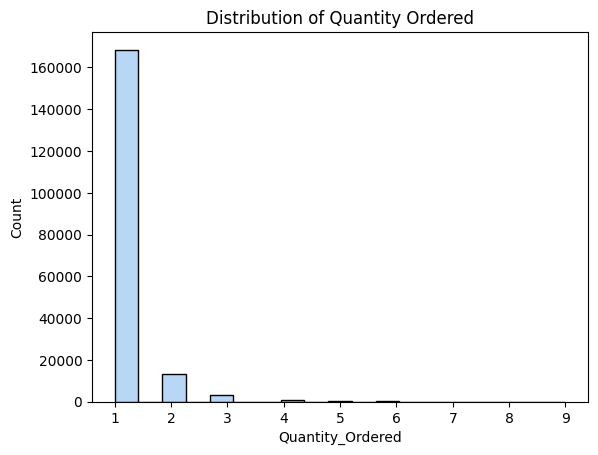

In [350]:
#The numerical columns are quantity_ordered and price each
#qauntity_ordered
#using seaborn's pastel color palette
sns.set_palette('pastel')
#plotting
sns.histplot(combined_df['Quantity_Ordered'])
plt.title('Distribution of Quantity Ordered')
plt.show()

**Key Insights**

The histogram above illustrates the distribution of the quantity of items ordered by customers. A significant observation from this analysis is that the majority of customers tend to order only one item per purchase. This trend suggests that either the products are typically bought individually or that the purchasing process may not incentivize bulk buying. Further investigation into customer behavior, product characteristics, and sales strategies could provide insights into optimizing the shopping experience and potentially increasing the average order quantity.

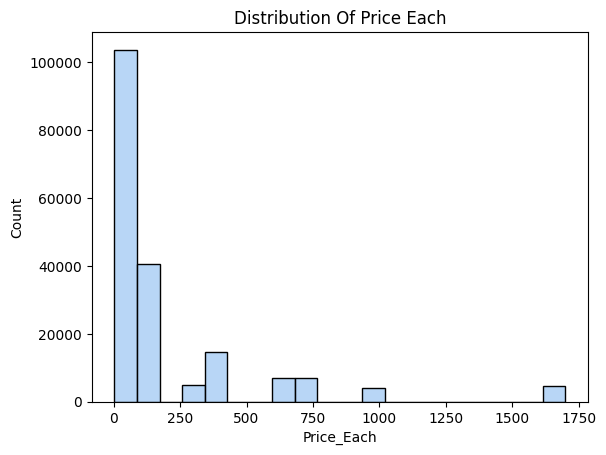

In [351]:
#price each
sns.histplot(combined_df['Price_Each'], bins = 20)
plt.title('Distribution Of Price Each')
plt.show()

**Insights**

The histogram for the Price_Each column shows that most products are sold at lower prices, with a high concentration of counts near zero. As prices increase, the number of purchases decreases, indicating that customers primarily buy lower-cost items, while fewer high-priced products are sold. This trend suggests that the bulk of sales comes from inexpensive products, which could guide pricing strategies or promotional efforts.

#### **Categorical columns**

In [352]:
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [353]:
#table to show counts
product_counts = combined_df['Product'].value_counts().reset_index()
#rename columns
product_counts.columns = ['Product', 'Count']
#sort in descending order
sorted_product_counts = product_counts.sort_values(by='Count', ascending=False)
print(sorted_product_counts)

                       Product  Count
0         USB-C Charging Cable  21903
1     Lightning Charging Cable  21658
2       AAA Batteries (4-pack)  20641
3        AA Batteries (4-pack)  20577
4             Wired Headphones  18882
5     Apple Airpods Headphones  15549
6   Bose SoundSport Headphones  13325
7             27in FHD Monitor   7507
8                       iPhone   6842
9       27in 4K Gaming Monitor   6230
10      34in Ultrawide Monitor   6181
11                Google Phone   5525
12               Flatscreen TV   4800
13          Macbook Pro Laptop   4724
14             ThinkPad Laptop   4128
15                20in Monitor   4101
16             Vareebadd Phone   2065
17          LG Washing Machine    666
18                    LG Dryer    646


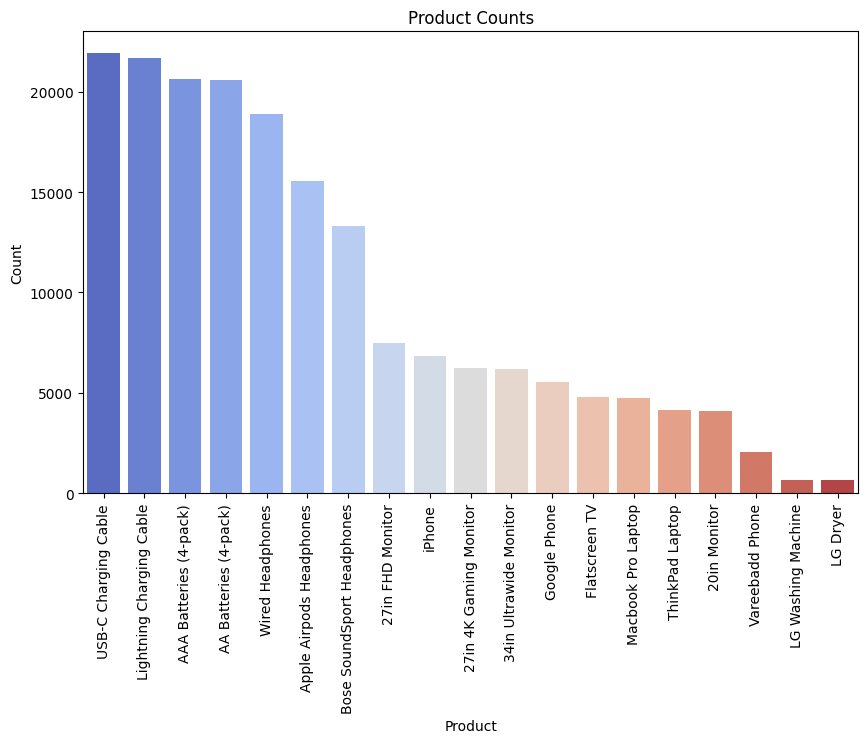

In [354]:
#bar chart in descending order
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y = 'Count', data = sorted_product_counts, palette='coolwarm')
#labels
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Product Counts')
plt.show()

**Insights**

The data reveals that USB-C Charging Cable and Lightning Charging Cable are the most frequently ordered items, highlighting their high demand. Batteries, including AAA Batteries (4-pack) and AA Batteries (4-pack), are also popular, suggesting a strong consumer preference for these essential items. Headphones, both wired and wireless, such as Wired Headphones, Apple Airpods Headphones, and Bose SoundSport Headphones, show significant order counts, indicating a notable interest in audio products. The dataset also reflects a broad range of categories from electronics to household items, with some less popular products like LG Washing Machine and LG Dryer having lower order counts. This information can inform inventory management and marketing strategies, emphasizing the need for focus on high-demand products while reevaluating the approach for items with lower sales.

In [355]:
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [356]:
#some analysis based on the city
combined_df['City'] = combined_df['Purchase_Address'].apply(lambda x: x.split(',')[1].strip())
print(combined_df[['Purchase_Address','City']])

                             Purchase_Address           City
0             944 Walnut St, Boston, MA 02215         Boston
1            185 Maple St, Portland, OR 97035       Portland
2       538 Adams St, San Francisco, CA 94016  San Francisco
3          738 10th St, Los Angeles, CA 90001    Los Angeles
4               387 10th St, Austin, TX 73301         Austin
...                                       ...            ...
25112  14 Madison St, San Francisco, CA 94016  San Francisco
25113    549 Willow St, Los Angeles, CA 90001    Los Angeles
25114        273 Wilson St, Seattle, WA 98101        Seattle
25115          778 River St, Dallas, TX 75001         Dallas
25116  747 Chestnut St, Los Angeles, CA 90001    Los Angeles

[185950 rows x 2 columns]


In [357]:
combined_df['State'] = combined_df['Purchase_Address'].apply(lambda x:x.split(',')[2].strip())

def extract_state(address):
    match = re.search(r'\b[A-Z]{2}\b', address)
    return match.group(0) if match else None

combined_df['State'] = combined_df['State'].apply(extract_state)

combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX


In [358]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

combined_df['State'] = combined_df['State'].replace(state_mapping)
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas


In [359]:
#cities
city_counts = combined_df['City'].value_counts().reset_index()
sorted_city_counts = city_counts.sort_values(by='count', ascending=False)
sorted_city_counts

,City,count
0,San Francisco,44732
1,Los Angeles,29605
2,New York City,24876
3,Boston,19934
4,Atlanta,14881
5,Dallas,14820
6,Seattle,14732
7,Portland,12465
8,Austin,9905


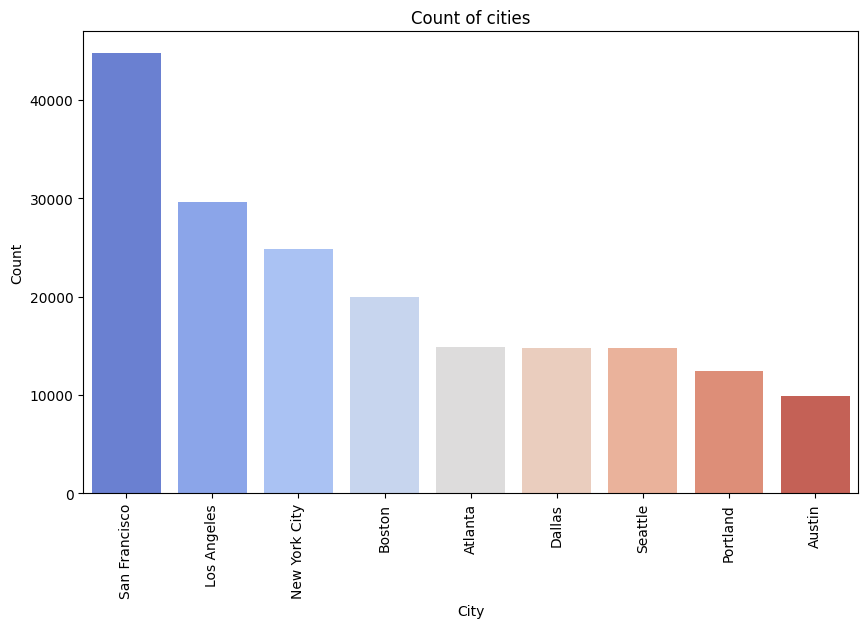

In [360]:
#plotting
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='count', data = sorted_city_counts, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of cities')
plt.xticks(rotation=90)
plt.show()

**Key Insights**

The city-wise order counts reveal that San Francisco leads with the highest number of orders, followed by Los Angeles and New York City, indicating these urban areas have the most substantial customer base. Boston, Atlanta, and Dallas also show significant order volumes, highlighting their importance in the sales network. Seattle, Portland, and Austin, while having lower counts compared to the top cities, still contribute notable order volumes. This distribution suggests a concentration of customers in major metropolitan areas, which can guide targeted marketing efforts and logistical planning to enhance service and inventory allocation in these key cities.

In [361]:
#states
state_counts = combined_df['State'].value_counts().reset_index()
sorted_state_counts = state_counts.sort_values(by='count', ascending=False)
sorted_state_counts

,State,count
0,California,74337
1,New York,24876
2,Texas,24725
3,Massachusetts,19934
4,Georgia,14881
5,Washington,14732
6,Oregon,10010
7,Maine,2455


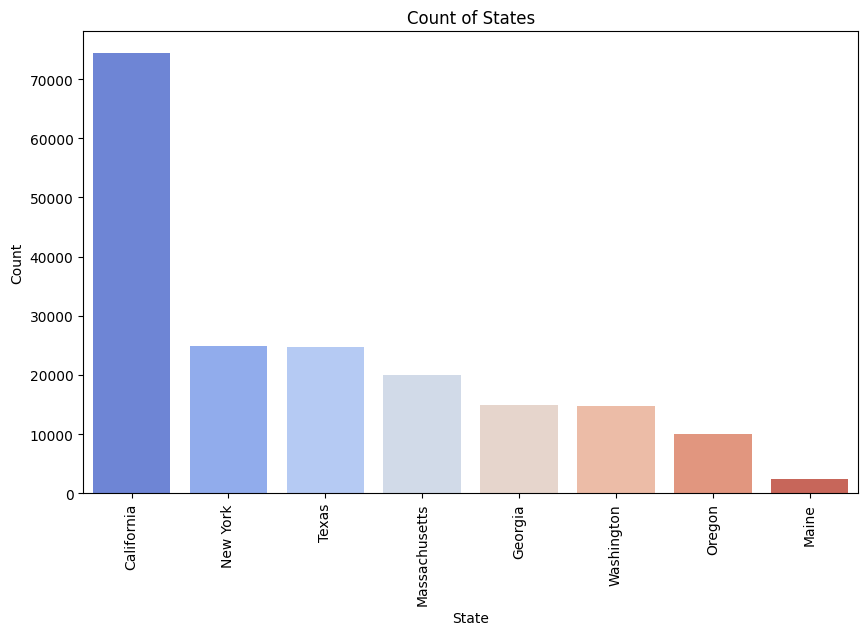

In [362]:
#plotting
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='count', data = sorted_state_counts, palette='coolwarm')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of States')
plt.xticks(rotation=90)
plt.show()

**Insights**

The state-wise order counts indicate that California leads with the highest number of orders, reflecting its significant customer base and market size. New York and Texas follow as major contributors, highlighting their substantial roles in the sales landscape. Massachusetts, Georgia, and Washington also show considerable order volumes, emphasizing their importance in the distribution network. Oregon and Maine, though having lower counts, still represent key regions. This distribution underscores California's dominant position in the market and provides insight into regional performance, which can be leveraged for strategic planning and resource allocation.

#### **Bivariate Analysis**

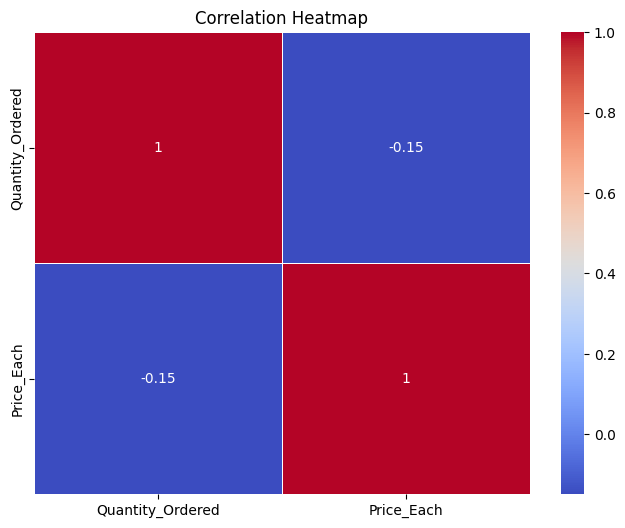

In [363]:
# Calculate the correlation matrix
correlation_matrix = df[['Quantity_Ordered', 'Price_Each']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**Insights**

In summary, a correlation of -0.15 suggests a very weak negative relationship between the variables. This means that while there is a slight tendency for one variable to decrease as the other increases, the relationship is not strong or significant.

In [364]:
combined_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'City', 'State'],
      dtype='object')

In [365]:
combined_df['Revenue'] = combined_df['Quantity_Ordered'] * combined_df['Price_Each']
revenue_per_product = combined_df.groupby(['Product'])['Revenue'].sum().reset_index()
sorted_revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending = False)
print(sorted_revenue_per_product.reset_index(drop=True))


                       Product       Revenue
0           Macbook Pro Laptop  8.037600e+06
1                       iPhone  4.794300e+06
2              ThinkPad Laptop  4.129959e+06
3                 Google Phone  3.319200e+06
4       27in 4K Gaming Monitor  2.435098e+06
5       34in Ultrawide Monitor  2.355558e+06
6     Apple Airpods Headphones  2.349150e+06
7                Flatscreen TV  1.445700e+06
8   Bose SoundSport Headphones  1.345565e+06
9             27in FHD Monitor  1.132425e+06
10             Vareebadd Phone  8.272000e+05
11                20in Monitor  4.541487e+05
12          LG Washing Machine  3.996000e+05
13                    LG Dryer  3.876000e+05
14    Lightning Charging Cable  3.470941e+05
15        USB-C Charging Cable  2.865012e+05
16            Wired Headphones  2.464784e+05
17       AA Batteries (4-pack)  1.061184e+05
18      AAA Batteries (4-pack)  9.274083e+04


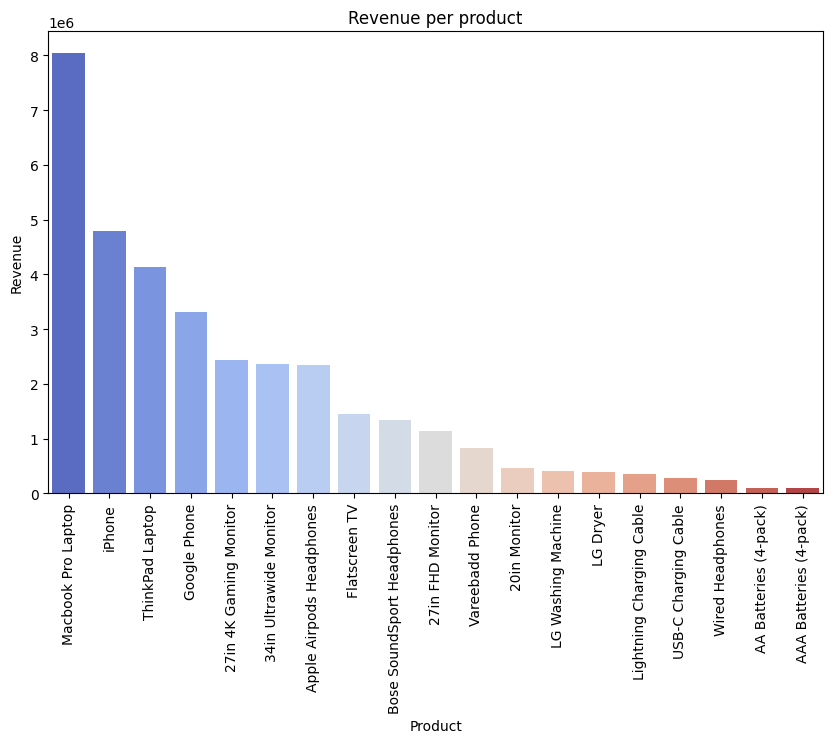

In [366]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='Revenue', data = sorted_revenue_per_product, palette='coolwarm')
plt.title('Revenue per product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

The revenue analysis reveals that the Macbook Pro Laptop is the highest revenue-generating product, contributing approximately $8.04 million, followed by the iPhone with $4.79 million. Other notable high-revenue items include the ThinkPad Laptop, Google Phone, and the 27in 4K Gaming Monitor. These products dominate the revenue figures, indicating strong customer preference and higher sales volume for premium electronics. In contrast, items like AA Batteries (4-pack) and AAA Batteries (4-pack), despite being sold in higher quantities, contribute significantly less to the overall revenue, reflecting their lower price points. This suggests a skew towards higher-priced electronics driving the majority of revenue, while lower-cost items contribute less to the total revenue but may still be important for overall sales volume and customer engagement.

In [367]:
#revenue per city
revenue_per_city = combined_df.groupby(['City'])['Revenue'].sum().reset_index()
sorted_revenue_per_city = revenue_per_city.sort_values(by='Revenue',ascending=False)
print(sorted_revenue_per_city.reset_index(drop=True))

            City       Revenue
0  San Francisco  8.262204e+06
1    Los Angeles  5.452571e+06
2  New York City  4.664317e+06
3         Boston  3.661642e+06
4        Atlanta  2.795499e+06
5         Dallas  2.767975e+06
6        Seattle  2.747755e+06
7       Portland  2.320491e+06
8         Austin  1.819582e+06


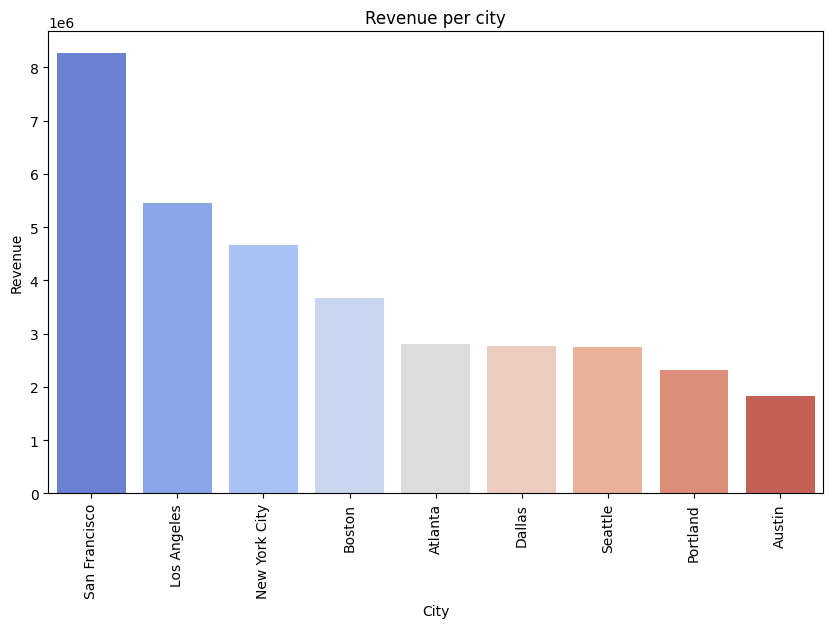

In [368]:
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Revenue', data = sorted_revenue_per_city, palette='coolwarm')
plt.title('Revenue per city')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

San Francisco not only leads in revenue but also has the highest number of purchases, with 44,732 transactions. This indicates a strong purchasing activity in the city, which aligns with its top revenue generation. Los Angeles and New York City, while also major revenue contributors, show lower purchase counts compared to San Francisco—29,605 and 24,876 respectively. Boston follows with a purchase count of 19,934, reflecting significant but lesser purchasing activity. Cities like Atlanta, Dallas, and Seattle, with purchase counts between 14,000 and 15,000, show solid activity but less than the top three. Portland and Austin, with counts of 12,465 and 9,905, have lower transaction volumes. This comparison suggests that while high revenue often correlates with high purchase volumes, revenue can also be influenced by higher-value purchases or pricing strategies in top cities.

In [369]:
#revenue per state
revenue_per_state = combined_df.groupby(['State'])['Revenue'].sum().reset_index()
sorted_revenue_per_state = revenue_per_state.sort_values(by='Revenue',ascending=False)
print(sorted_revenue_per_state.reset_index(drop=True))

           State       Revenue
0     California  1.371477e+07
1       New York  4.664317e+06
2          Texas  4.587557e+06
3  Massachusetts  3.661642e+06
4        Georgia  2.795499e+06
5     Washington  2.747755e+06
6         Oregon  1.870732e+06
7          Maine  4.497583e+05


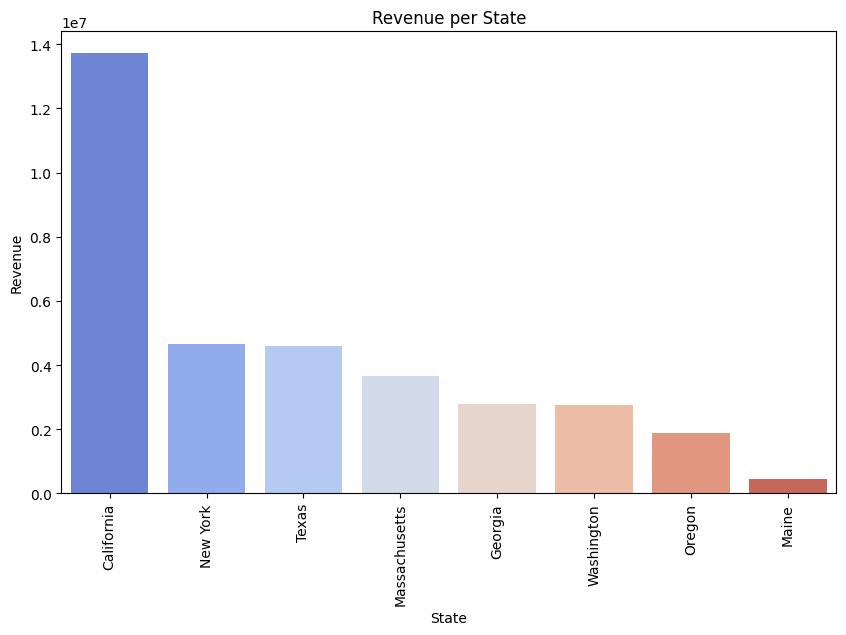

In [370]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Revenue', data = sorted_revenue_per_state, palette='coolwarm')
plt.title('Revenue per State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

In the analysis of revenue and purchase counts across states, California stands out with both the highest revenue of approximately $13.71 million and the highest number of purchases (74,337). This indicates a significant concentration of purchasing power in California. New York and Texas follow, with revenues of around $4.66 million and $4.59 million respectively, and purchase counts of 24,876 and 24,725. Massachusetts, generating $3.66 million in revenue from 19,934 purchases, also shows strong performance. Georgia and Washington, with revenues of $2.80 million and $2.75 million and purchase counts of 14,881 and 14,732 respectively, contribute notably to the overall revenue. Oregon and Maine generate lower revenues of $1.87 million and $449,758 respectively, correlating with their lower purchase counts of 10,010 and 2,455. The data underscores that while California dominates in revenue and purchase volume, other states also contribute significantly, with revenue reflecting their purchasing activity.

#### **Time-series Analysis**

**Quartely sales analysis**

In [371]:
combined_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'City', 'State', 'Revenue'],
      dtype='object')

In [372]:
print(combined_df['Order_Date'].head())


0    2019-01-22 21:25:00
1    2019-01-28 14:15:00
2    2019-01-17 13:33:00
3    2019-01-05 20:33:00
4    2019-01-25 11:59:00
Name: Order_Date, dtype: object
